# Building Predictive Machine Learning Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [244]:
loan_df = pd.read_csv('dataset/new_lending_club_loans.csv')
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,emp_title,home_ownership,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,term_months,int_rate_%,emp_length_year,revol_util_%
0,1077501,1296599,5000.0,5000.0,4975.0,162.87,B,B2,Other,RENT,...,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,36,10.65,10,83.7
1,1077430,1314167,2500.0,2500.0,2500.0,59.83,C,C4,Ryder,RENT,...,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,60,15.27,0,9.4
2,1077175,1313524,2400.0,2400.0,2400.0,84.33,C,C5,Other,RENT,...,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,36,15.96,10,98.5
3,1076863,1277178,10000.0,10000.0,10000.0,339.31,C,C1,AIR RESOURCES BOARD,RENT,...,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,36,13.49,10,21.0
4,1075358,1311748,3000.0,3000.0,3000.0,67.79,B,B5,University Medical Group,RENT,...,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,60,12.69,1,53.9


In [3]:
loan_df.shape

(42420, 58)

In [4]:
data_description = pd.read_csv('dataset/LCDataDictionary.csv')
data_description.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [5]:
pd.set_option("display.max_colwidth",-1)

In [6]:
for i in range(data_description.shape[0]):
    if data_description.loc[i]['LoanStatNew'] not in loan_df:
        data_description.drop(index=i, inplace=True)

In [7]:
data_description.reset_index(drop=True, inplace=True)

In [8]:
data_description

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,addr_state,The state provided by the borrower in the loan application
2,annual_inc,The self-reported annual income provided by the borrower during registration.
3,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
4,chargeoff_within_12_mths,Number of charge-offs within 12 months
5,collection_recovery_fee,post charge off collection fee
6,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
7,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
8,delinq_amnt,The past-due amount owed for the accounts on which the borrower is now delinquent.
9,desc,Loan description provided by the borrower


# Data Preparation

## Columns to drop

    id — randomly generated field by LendingClub for unique identification purposes only.

    member_id — also randomly generated field by LendingClub for identification purposes only.

    funded_amnt — leaks information from the future (after the loan is already started to be funded).

    funded_amnt_inv — also leaks data from the future.

    sub_grade — contains redundant information that is already in the grade column.

    int_rate — also included within the grade column.

    emp_title — requires other data and a lot of processing to become potentially useful

    issued_d — leaks data from the future.

    zip_code – mostly redundant with the addr_state column since only the first 3 digits of the 5 digit zip code are visible.

    out_prncp – leaks data from the future.

    out_prncp_inv – also leaks data from the future.

    total_pymnt – also leaks data from the future.

    total_pymnt_inv – also leaks data from the future.

    total_rec_prncp - also leaks data from the future.

    total_rec_int - also leaks data from the future.

    total_rec_late_fee - also leaks data from the future.

    recoveries - also leaks data from the future.

    collection_recovery_fee - also leaks data from the future.

    last_pymnt_d - also leaks data from the future.

    last_pymnt_amnt - also leaks data from the future.

In [245]:
drop_cols = ['id',
             'member_id',
             'funded_amnt',
             'funded_amnt_inv',
             'sub_grade',
             'int_rate_%',
             'emp_title',
             'issue_d',
             'zip_code',
             'out_prncp',
             'out_prncp_inv',
             'total_pymnt',
             'total_pymnt_inv',
             'total_rec_prncp',
             'total_rec_int',
             'total_rec_late_fee',
             'recoveries',
             'collection_recovery_fee',
             'last_pymnt_d',
             'last_pymnt_amnt',
            ]

In [246]:
loan_df.drop(columns=drop_cols, axis=1, inplace=True)

In [247]:
loan_df.sample()

,loan_amnt,installment,grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,url,desc,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,term_months,emp_length_year,revol_util_%
27177,20000.0,625.63,A,MORTGAGE,110000.0,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=557825,not filled,...,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,36,10,48.8


In [248]:
loan_df['pymnt_plan'].value_counts()

n    42419
y    1    
Name: pymnt_plan, dtype: int64

In [249]:
loan_df['application_type'].value_counts()

INDIVIDUAL    42420
Name: application_type, dtype: int64

In [250]:
loan_df['addr_state'].value_counts()

CA    7406
NY    4047
FL    3097
TX    2904
NJ    1982
IL    1669
PA    1649
GA    1500
VA    1483
MA    1433
OH    1326
MD    1120
AZ    932 
WA    887 
CO    855 
NC    828 
CT    812 
MI    795 
MO    762 
MN    651 
NV    527 
WI    515 
SC    489 
AL    482 
OR    467 
LA    460 
KY    357 
OK    317 
KS    297 
UT    278 
AR    261 
DC    224 
RI    208 
NM    205 
NH    188 
WV    186 
HI    181 
DE    135 
MT    96  
WY    87  
AK    86  
SD    67  
VT    57  
TN    32  
MS    26  
IN    19  
IA    12  
NE    11  
ID    9   
ME    3   
Name: addr_state, dtype: int64

In [251]:
loan_df['title'].value_counts()

Debt Consolidation          2256
Debt Consolidation Loan     1756
Personal Loan               706 
Consolidation               546 
debt consolidation          532 
                           ...  
car fund                    1   
Earl's Loan                 1   
No Debt 2                   1   
Starting a Side Business    1   
Minor Home Loan             1   
Name: title, Length: 21209, dtype: int64

In [252]:
drop_cols = ['pymnt_plan','url','desc','addr_state','application_type','title']

In [253]:
loan_df.drop(columns=drop_cols, axis=0, inplace=True)

In [254]:
loan_df.sample()

,loan_amnt,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,...,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,term_months,emp_length_year,revol_util_%
19546,25000.0,603.32,D,OWN,65000.0,Verified,Fully Paid,debt_consolidation,11.19,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,60,5,54.7


In [255]:
loan_df.describe()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,...,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,term_months,emp_length_year,revol_util_%
count,42420.000000,42420.000000,4.242000e+04,42420.000000,42420.000000,42420.000000,42420.000000,42420.000000,42420.000000,42420.000000,...,42420.0,42420.0,42420.000000,42420.0,42420.000000,42420.000000,42420.000000,42420.000000,42420.000000,42420.000000
mean,11100.622348,322.899562,6.916992e+04,13.380188,0.152263,713.073432,717.073432,1.079939,9.348208,0.058086,...,0.0,1.0,0.000094,0.0,0.143329,0.043729,0.000024,42.213861,4.798373,49.049401
std,7409.234126,208.855377,6.413422e+04,6.724445,0.511900,36.181801,36.181801,1.526400,4.496276,0.245609,...,0.0,0.0,0.009710,0.0,29.389325,0.205415,0.004855,10.513002,3.607687,28.400152
min,500.000000,15.670000,1.896000e+03,0.000000,0.000000,610.000000,614.000000,0.000000,1.000000,0.000000,...,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,36.000000,0.000000,0.000000
25%,5200.000000,165.740000,4.000000e+04,8.210000,0.000000,685.000000,689.000000,0.000000,6.000000,0.000000,...,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,36.000000,2.000000,25.600000
50%,9775.000000,278.150000,5.900000e+04,13.480000,0.000000,710.000000,714.000000,1.000000,9.000000,0.000000,...,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,36.000000,4.000000,49.600000
75%,15000.000000,428.592500,8.250000e+04,18.690000,0.000000,740.000000,744.000000,2.000000,12.000000,0.000000,...,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,60.000000,9.000000,72.600000
max,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,825.000000,829.000000,33.000000,47.000000,5.000000,...,0.0,1.0,1.000000,0.0,6053.000000,2.000000,1.000000,60.000000,10.000000,119.000000


In [256]:
drop_cols = ['earliest_cr_line',
             'initial_list_status',
             'last_credit_pull_d',
             'collections_12_mths_ex_med',
             'policy_code',
             'acc_now_delinq',
             'chargeoff_within_12_mths',
             'delinq_amnt',
             'pub_rec_bankruptcies',
             'tax_liens'
            ]

In [257]:
loan_df[drop_cols].describe()

,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,42420.0,42420.0,42420.000000,42420.0,42420.000000,42420.000000,42420.000000
mean,0.0,1.0,0.000094,0.0,0.143329,0.043729,0.000024
std,0.0,0.0,0.009710,0.0,29.389325,0.205415,0.004855
min,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
max,0.0,1.0,1.000000,0.0,6053.000000,2.000000,1.000000


In [258]:
loan_df.drop(columns=drop_cols, axis=0, inplace=True)

In [259]:
loan_df.sample()

,loan_amnt,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,...,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,last_fico_range_high,last_fico_range_low,term_months,emp_length_year,revol_util_%
23062,14400.0,367.0,F,RENT,45000.0,Verified,Fully Paid,debt_consolidation,18.08,0.0,...,1.0,4.0,0.0,4286.0,7.0,649.0,645.0,60,10,99.7


### Investigating FICO Score Columns

In [260]:
loan_df['fico_range_high'].unique()

array([739., 744., 694., 699., 734., 664., 679., 729., 714., 709., 724.,
       669., 674., 764., 689., 759., 684., 704., 794., 754., 719., 769.,
       749., 774., 784., 779., 799., 814., 804., 819., 789., 809., 829.,
       824., 634., 629., 654., 659., 649., 644., 639., 614., 624., 619.])

In [261]:
loan_df['fico_range_low'].unique()

array([735., 740., 690., 695., 730., 660., 675., 725., 710., 705., 720.,
       665., 670., 760., 685., 755., 680., 700., 790., 750., 715., 765.,
       745., 770., 780., 775., 795., 810., 800., 815., 785., 805., 825.,
       820., 630., 625., 650., 655., 645., 640., 635., 610., 620., 615.])

<Figure size 720x432 with 0 Axes>

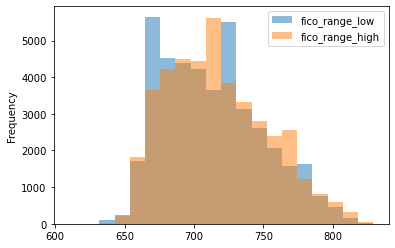

In [262]:
plt.figure(figsize=(10,6))
loan_df[['fico_range_low','fico_range_high']].plot.hist(alpha=0.5, bins=20)
plt.show()

### FICO Score Average

In [263]:
loan_df['fico_average'] = (loan_df['fico_range_low'] + loan_df['fico_range_high'])/2

In [264]:
loan_df[['fico_range_low','fico_range_high','fico_average']]

,fico_range_low,fico_range_high,fico_average
0,735.0,739.0,737.0
1,740.0,744.0,742.0
2,735.0,739.0,737.0
3,690.0,694.0,692.0
4,695.0,699.0,697.0
...,...,...,...
42415,660.0,664.0,662.0
42416,650.0,654.0,652.0
42417,800.0,804.0,802.0
42418,695.0,699.0,697.0


In [265]:
loan_df.drop(columns=['fico_range_low',
                      'fico_range_high',
                      'last_fico_range_high',
                      'last_fico_range_low'],
            axis=1, inplace=True)

In [266]:
loan_df

,loan_amnt,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,term_months,emp_length_year,revol_util_%,fico_average
0,5000.0,162.87,B,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,9.0,36,10,83.7,737.0
1,2500.0,59.83,C,RENT,30000.0,Source Verified,Charged Off,car,1.00,0.0,5.0,3.0,0.0,1687.0,4.0,60,0,9.4,742.0
2,2400.0,84.33,C,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,10.0,36,10,98.5,737.0
3,10000.0,339.31,C,RENT,49200.0,Source Verified,Fully Paid,other,20.00,0.0,1.0,10.0,0.0,5598.0,37.0,36,10,21.0,692.0
4,3000.0,67.79,B,RENT,80000.0,Source Verified,Current,other,17.94,0.0,0.0,15.0,0.0,27783.0,38.0,60,1,53.9,697.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42415,5350.0,180.57,D,OWN,4000.0,Not Verified,Does not meet the credit policy. Status:Fully Paid,car,15.00,0.0,1.0,1.0,0.0,0.0,1.0,36,1,0.0,662.0
42416,10000.0,345.18,E,RENT,50000.0,Not Verified,Does not meet the credit policy. Status:Fully Paid,educational,7.22,2.0,0.0,14.0,0.0,10025.0,20.0,36,1,85.0,652.0
42417,2000.0,61.87,A,MORTGAGE,150000.0,Not Verified,Does not meet the credit policy. Status:Fully Paid,debt_consolidation,5.60,0.0,0.0,7.0,0.0,150786.0,16.0,36,7,2.2,802.0
42418,6000.0,195.28,C,RENT,20000.0,Not Verified,Does not meet the credit policy. Status:Fully Paid,debt_consolidation,12.90,0.0,4.0,5.0,0.0,13660.0,6.0,36,0,66.0,697.0


### Loan Status

In [267]:
loan_df['loan_status']

0        Fully Paid                                        
1        Charged Off                                       
2        Fully Paid                                        
3        Fully Paid                                        
4        Current                                           
          ...                                              
42415    Does not meet the credit policy. Status:Fully Paid
42416    Does not meet the credit policy. Status:Fully Paid
42417    Does not meet the credit policy. Status:Fully Paid
42418    Does not meet the credit policy. Status:Fully Paid
42419    Does not meet the credit policy. Status:Fully Paid
Name: loan_status, Length: 42420, dtype: object

In [268]:
loan_df['loan_status'].value_counts()

Fully Paid                                             33585
Charged Off                                            5581 
Does not meet the credit policy. Status:Fully Paid     1961 
Does not meet the credit policy. Status:Charged Off    746  
Current                                                513  
In Grace Period                                        16   
Late (31-120 days)                                     12   
Late (16-30 days)                                      5    
Default                                                1    
Name: loan_status, dtype: int64

In [33]:
# loan_df['loan_status'].replace({'Does not meet the credit policy. Status:Fully Paid':'Fully Paid',
#                                'Does not meet the credit policy. Status:Charged Off':'Charged Off'},
#                               inplace=True)

In [34]:
# loan_df['loan_status'].value_counts()

Fully Paid            35546
Charged Off           6327 
Current               513  
In Grace Period       16   
Late (31-120 days)    12   
Late (16-30 days)     5    
Default               1    
Name: loan_status, dtype: int64

In [269]:
loan_df = loan_df[(loan_df['loan_status']=='Fully Paid') | (loan_df['loan_status']=='Charged Off')]

In [270]:
loan_df.reset_index(drop=True, inplace=True)

In [271]:
loan_df.shape

(39166, 19)

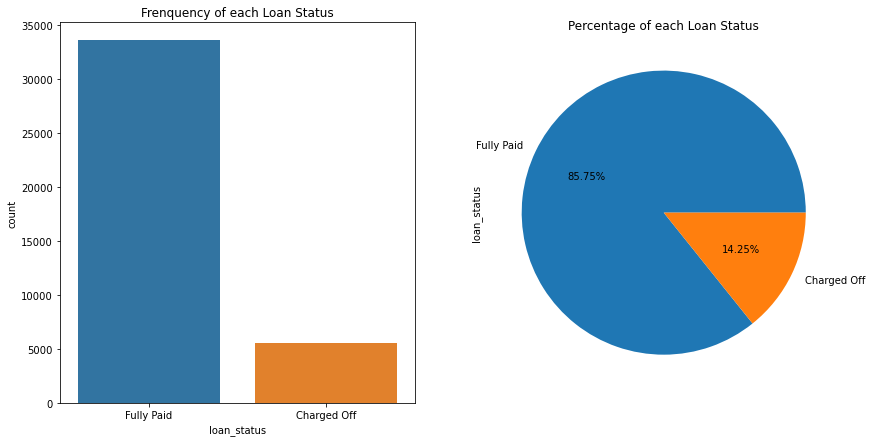

In [272]:
fig, ax = plt.subplots(1,2, figsize=(14,7))
sns.countplot(x='loan_status', data=loan_df, ax=ax[0])
ax[0].set_title('Frenquency of each Loan Status')
loan_df['loan_status'].value_counts().plot(kind='pie', ax=ax[1], autopct='%1.2f%%')
ax[1].set_title('Percentage of each Loan Status')
plt.show()

## Encode Categorical Columns

In [273]:
cat_cols = []
for data in loan_df:
    if loan_df[data].dtype == 'object':
        cat_cols.append(data)
cat_cols.remove('loan_status')
print(cat_cols)

['grade', 'home_ownership', 'verification_status', 'purpose']


In [274]:
dummies_df = pd.get_dummies(loan_df[cat_cols])

In [275]:
loan_df = pd.concat([loan_df,dummies_df], axis=1)

In [276]:
loan_df.drop(columns=cat_cols, inplace=True)

In [277]:
loan_df

,loan_amnt,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,162.87,24000.0,Fully Paid,27.65,0.0,1.0,3.0,0.0,13648.0,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,59.83,30000.0,Charged Off,1.00,0.0,5.0,3.0,0.0,1687.0,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,84.33,12252.0,Fully Paid,8.72,0.0,2.0,2.0,0.0,2956.0,...,0,0,0,0,0,0,0,1,0,0
3,10000.0,339.31,49200.0,Fully Paid,20.00,0.0,1.0,10.0,0.0,5598.0,...,0,0,0,0,0,1,0,0,0,0
4,5000.0,156.46,36000.0,Fully Paid,11.20,0.0,3.0,9.0,0.0,7963.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39161,2500.0,78.42,110000.0,Fully Paid,11.33,0.0,0.0,13.0,0.0,7274.0,...,1,0,0,0,0,0,0,0,0,0
39162,8500.0,275.38,18000.0,Fully Paid,6.40,1.0,1.0,6.0,0.0,8847.0,...,0,0,0,0,0,0,0,0,0,0
39163,5000.0,156.84,100000.0,Fully Paid,2.30,0.0,0.0,11.0,0.0,9698.0,...,0,0,0,0,0,0,0,0,0,0
39164,5000.0,155.38,200000.0,Fully Paid,3.72,0.0,0.0,17.0,0.0,85607.0,...,0,0,0,0,0,1,0,0,0,0


## Input & Target Columns

In [278]:
X_df = loan_df.drop(columns=['loan_status'], axis=1)
y_df = loan_df['loan_status']

In [279]:
X_df.shape, y_df.shape

((39166, 43), (39166,))

## Training & Testing Data

In [280]:
from sklearn.model_selection import train_test_split

In [415]:
X_train,X_test,y_train,y_test = train_test_split(X_df, y_df, test_size=0.25, random_state=42)

In [416]:
X_train.shape

(29374, 43)

In [417]:
X_test.shape

(9792, 43)

In [418]:
y_train.shape

(29374,)

In [419]:
y_test.shape

(9792,)

In [420]:
X_train.head()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
22780,4500.0,151.58,13200.0,7.27,1.0,2.0,2.0,0.0,3525.0,3.0,...,0,0,1,0,0,0,0,0,0,0
21108,10000.0,303.27,55000.0,14.03,0.0,1.0,9.0,0.0,9991.0,18.0,...,0,0,1,0,0,0,0,0,0,0
24693,6000.0,148.54,31000.0,20.48,1.0,1.0,9.0,0.0,6646.0,12.0,...,0,0,0,0,0,0,0,0,0,0
30084,15000.0,503.50,49439.0,18.96,0.0,0.0,16.0,1.0,20526.0,24.0,...,0,0,0,0,0,0,0,0,0,0
15394,16000.0,342.88,62400.0,0.00,0.0,0.0,4.0,0.0,0.0,18.0,...,1,0,0,0,0,0,0,0,0,0


In [421]:
y_train.head()

22780    Fully Paid 
21108    Charged Off
24693    Fully Paid 
30084    Charged Off
15394    Fully Paid 
Name: loan_status, dtype: object

# Making Predictive Model

In [422]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.tree import plot_tree

## Logistic Regression

In [423]:
log_model = LogisticRegression()

log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)

In [424]:
print(metrics.classification_report(y_test, log_pred))

              precision    recall  f1-score   support

 Charged Off       0.00      0.00      0.00      1343
  Fully Paid       0.86      1.00      0.93      8449

    accuracy                           0.86      9792
   macro avg       0.43      0.50      0.46      9792
weighted avg       0.74      0.86      0.80      9792



## Decision Tree

In [425]:
dec_model = DecisionTreeClassifier(criterion='entropy', max_depth=3)

dec_model.fit(X_train, y_train)

dec_pred = dec_model.predict(X_test)

In [426]:
print(metrics.classification_report(y_test, dec_pred))

              precision    recall  f1-score   support

 Charged Off       0.00      0.00      0.00      1343
  Fully Paid       0.86      1.00      0.93      8449

    accuracy                           0.86      9792
   macro avg       0.43      0.50      0.46      9792
weighted avg       0.74      0.86      0.80      9792



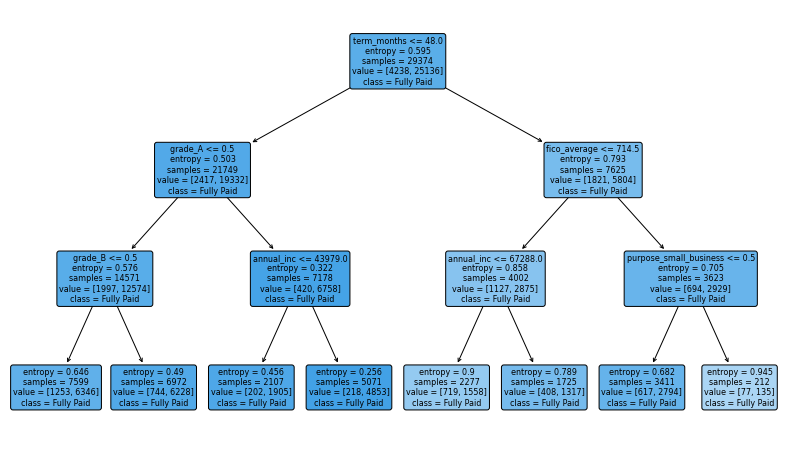

In [427]:
plt.figure(figsize=(14,8))
plot_tree(dec_model,
          feature_names=X_test.columns,
          class_names=dec_pred,
          filled=True,
          rounded=True,
          fontsize=8)
plt.show()

## Random Forest

In [428]:
rc_model = RandomForestClassifier(n_estimators=100, criterion='entropy')

rc_model.fit(X_train, y_train)

rc_pred = rc_model.predict(X_test)

In [429]:
print(metrics.classification_report(y_test, rc_pred))

              precision    recall  f1-score   support

 Charged Off       0.42      0.01      0.01      1343
  Fully Paid       0.86      1.00      0.93      8449

    accuracy                           0.86      9792
   macro avg       0.64      0.50      0.47      9792
weighted avg       0.80      0.86      0.80      9792



## Support Vector Machine

In [430]:
svc_model = SVC(kernel='sigmoid')

svc_model.fit(X_train, y_train)

svc_pred = svc_model.predict(X_test)

In [431]:
print(metrics.classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

 Charged Off       0.13      0.14      0.13      1343
  Fully Paid       0.86      0.86      0.86      8449

    accuracy                           0.76      9792
   macro avg       0.50      0.50      0.50      9792
weighted avg       0.76      0.76      0.76      9792



# Model Evaluation

In [432]:
models = {
    'Logistic Regression Model':log_model,
    'Decision Tree Model':dec_model,
    'Random Forest Model':rc_model,
    'Support Vector Model':svc_model
}

## Training Accuracy Score

In [434]:
for name,model in models.items():
    print('Model Name :',name,'| Accuracy Score :',metrics.accuracy_score(y_train, model.predict(X_train)))

Model Name : Logistic Regression Model | Accuracy Score : 0.8557227480084428
Model Name : Decision Tree Model | Accuracy Score : 0.8557227480084428
Model Name : Random Forest Model | Accuracy Score : 1.0
Model Name : Support Vector Model | Accuracy Score : 0.7501191529924423


## Testing Accuracy Score

In [435]:
for name,model in models.items():
    print('Model Name :',name,'| Accuracy Score :',metrics.accuracy_score(y_test, model.predict(X_test)))

Model Name : Logistic Regression Model | Accuracy Score : 0.8628472222222222
Model Name : Decision Tree Model | Accuracy Score : 0.8628472222222222
Model Name : Random Forest Model | Accuracy Score : 0.8624387254901961
Model Name : Support Vector Model | Accuracy Score : 0.7591911764705882
